In [ ]:
# The GARCH models we've built so far didn't include the fact that the volatility can vary when in loss or in gain
# To include this asymmetric relationship in the variance model, we can use EGARCH 

In [1]:
### Import necassary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('New Research Data (with detrended data).csv')
df = df.dropna()
date = pd.date_range(start = '2006', periods = len(df), freq = 'W')

C:\Users\jason wang\AppData\Local\Temp\ipykernel_13132\3304759387.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


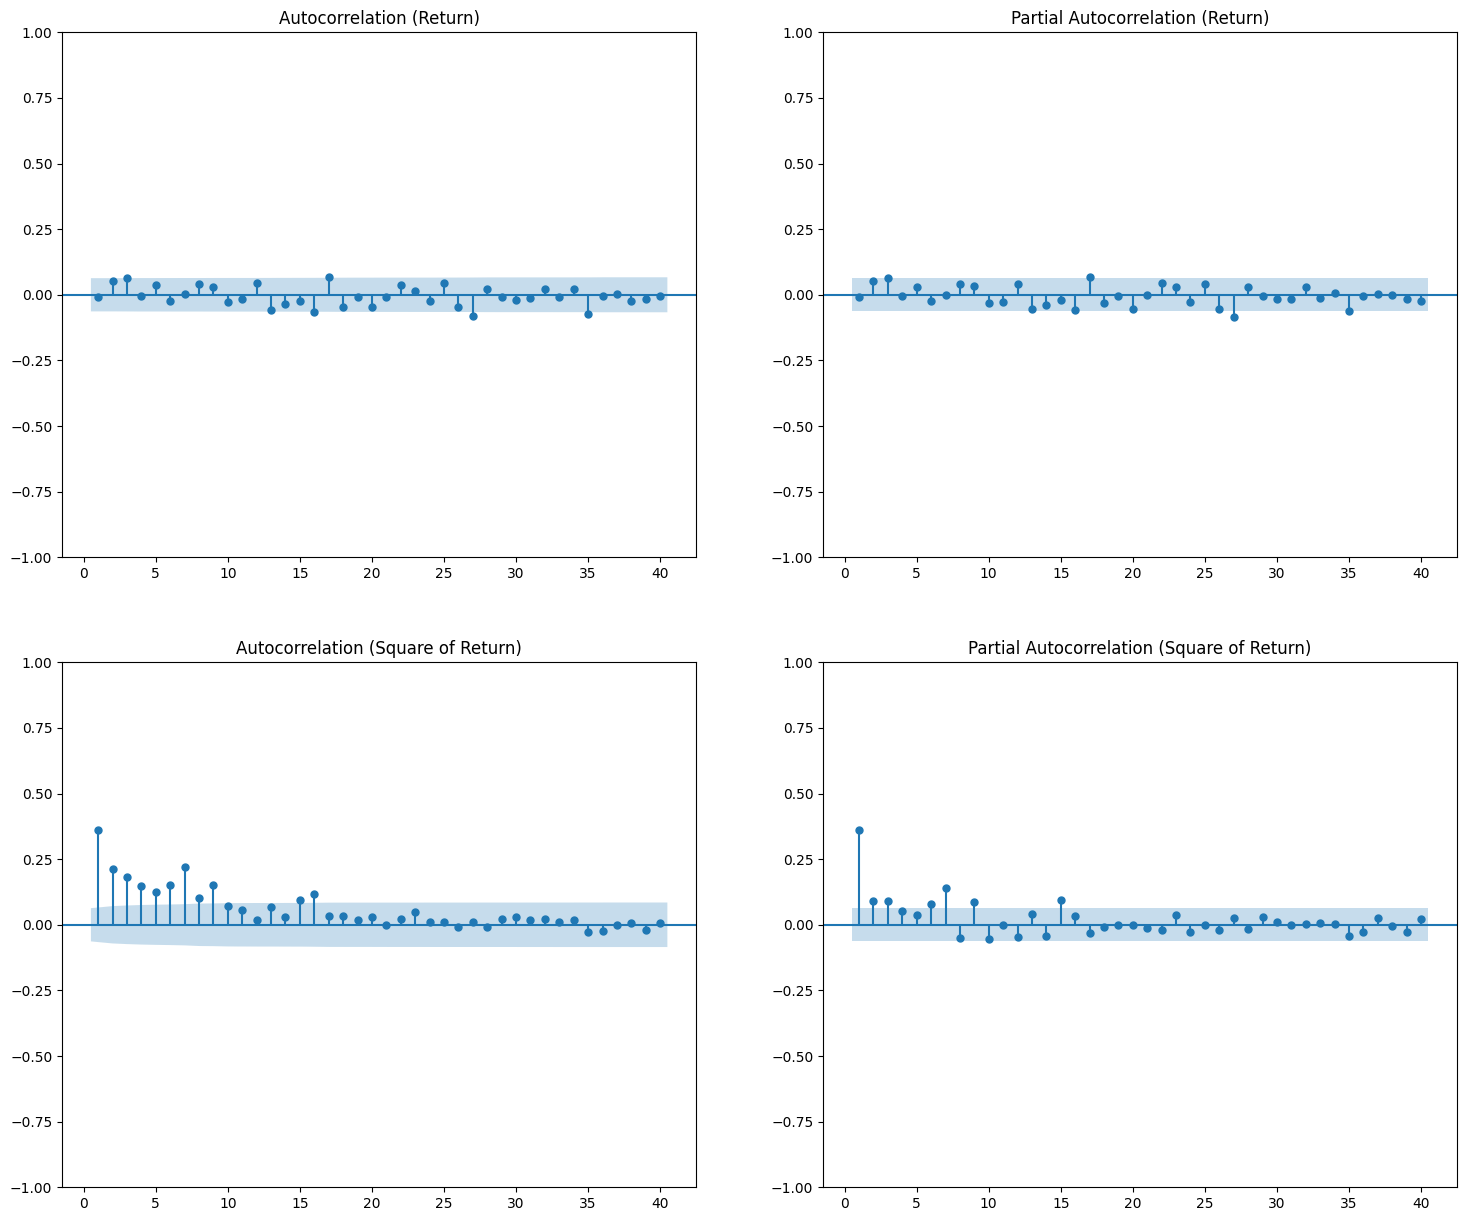

In [3]:
# Volatility
# Let's look at the ACF functions of oil price again
import statsmodels.graphics.tsaplots as sgt
fig, ax = plt.subplots(2, 2, figsize = (18,15))

sgt.plot_acf(df['Return'], zero = False, lags = 40, ax=ax[0][0], title='Autocorrelation (Return)')

sgt.plot_pacf(df['Return'], zero = False, lags = 40, ax=ax[0][1], title='Partial Autocorrelation (Return)')

sgt.plot_acf(df['Return']**2, zero = False, lags = 40, ax=ax[1][0], title='Autocorrelation (Square of Return)')

sgt.plot_pacf(df['Return']**2, zero = False, lags = 40, ax=ax[1][1], title='Partial Autocorrelation (Square of Return)')

plt.show()

In [3]:
# Build a GARCH model that integrate Net Position changes as a independent variable in the mean model
df['D_NL'] = np.append(np.nan, np.diff(df['Detrended PNL'])/df['Detrended PNL'][:-1])
df = df.dropna()
from arch import arch_model
mdl_garch_DNL = arch_model(df['Return'],x = df['D_NL'], mean='ARX', vol = 'GARCH', p = 1, q = 1)
garch_DNL = mdl_garch_DNL.fit()

print('GARCH_DNL: ','\n', garch_DNL.summary)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 808615594.0788465
Iteration:      2,   Func. Count:     23,   Neg. LLF: 65818419.8911186
Iteration:      3,   Func. Count:     35,   Neg. LLF: 4342.167676184014
Iteration:      4,   Func. Count:     45,   Neg. LLF: 2508293.0346066994
Iteration:      5,   Func. Count:     55,   Neg. LLF: -1366.7377202619778
Iteration:      6,   Func. Count:     64,   Neg. LLF: -1173.8883685139256
Iteration:      7,   Func. Count:     72,   Neg. LLF: -1564.805556489293
Iteration:      8,   Func. Count:     79,   Neg. LLF: -1274.2830527565698
Iteration:      9,   Func. Count:     87,   Neg. LLF: -1569.156263862575
Iteration:     10,   Func. Count:     93,   Neg. LLF: -1569.1650235881311
Iteration:     11,   Func. Count:     99,   Neg. LLF: -1569.1674800532173
Iteration:     12,   Func. Count:    105,   Neg. LLF: -1569.1678993476867
Iteration:     13,   Func. Count:    111,   Neg. LLF: -1569.167917483349
Iteration:     14,   Func. Count:    116,   Neg. 

C:\Users\jason wang\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00267. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [4]:
# Build a EGARCH model that integrate Net Position changes as a independent variable in the mean model
import statsmodels.api as sm
from arch import arch_model
df['D_NL'] = np.append(np.nan, np.diff(df['Detrended PNL'])/df['Detrended PNL'][:-1])
df = df.dropna()
mdl_egarch_DNL = arch_model(df['Return'],x = df['D_NL'], mean='ARX', vol = 'EGARCH', p = 1, o = 1, q = 1)
egarch_DNL = mdl_egarch_DNL.fit()

print('EGARCH_DNL: ','\n', egarch_DNL.summary)
# The coefficient of gamma in the variance model is significant and negative, that means the loss in price has more influence on volatility

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2.817917142427651e+18
Iteration:      2,   Func. Count:     23,   Neg. LLF: 270351.3565728991
Iteration:      3,   Func. Count:     37,   Neg. LLF: 12002969.384233523
Iteration:      4,   Func. Count:     48,   Neg. LLF: 448416225589.03705
Iteration:      5,   Func. Count:     59,   Neg. LLF: 68542.48409415208
Iteration:      6,   Func. Count:     69,   Neg. LLF: 554331312.9478639
Iteration:      7,   Func. Count:     78,   Neg. LLF: -1576.5058393567695
Iteration:      8,   Func. Count:     85,   Neg. LLF: -1576.5173010521776
Iteration:      9,   Func. Count:     92,   Neg. LLF: -1576.520188190514
Iteration:     10,   Func. Count:     99,   Neg. LLF: -1576.5202224456827
Iteration:     11,   Func. Count:    106,   Neg. LLF: -1576.5202250621896
Iteration:     12,   Func. Count:    112,   Neg. LLF: -1576.5202250492248
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1576.5202250621896
         

C:\Users\jason wang\AppData\Local\Temp\ipykernel_13132\930361692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['D_NL'] = np.append(np.nan, np.diff(df['Detrended PNL'])/df['Detrended PNL'][:-1])
C:\Users\jason wang\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002665. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


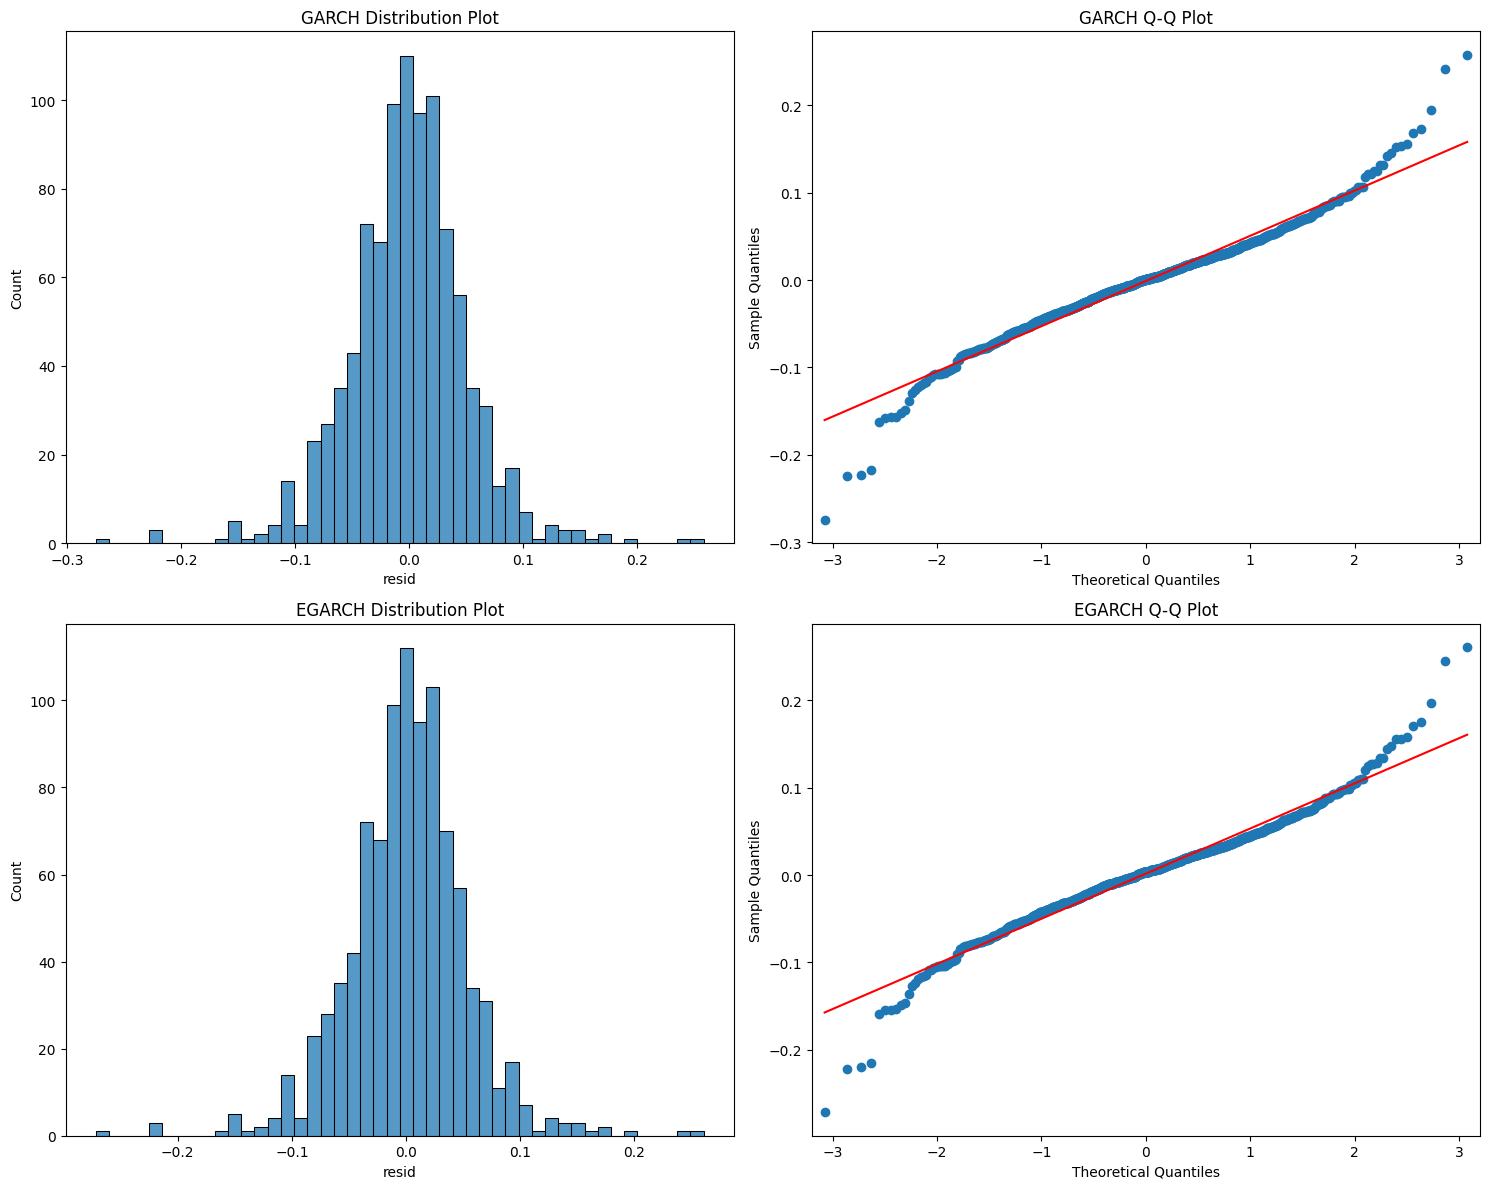

In [13]:
# Check the distribution of the residuals in each model
import seaborn as sns
res = garch_DNL.resid
e_res = egarch_DNL.resid

fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(221)
sns.histplot(res,ax=ax1)
ax1.set_title('GARCH Distribution Plot')

ax2 = fig.add_subplot(222)
sm.qqplot(res,line="s",ax=ax2)
ax2.set_title('GARCH Q-Q Plot')

ax3 = fig.add_subplot(223)
sns.histplot(e_res,ax=ax3)
ax3.set_title('EGARCH Distribution Plot')

ax4 = fig.add_subplot(224)
sm.qqplot(e_res,line="s",ax=ax4)
ax4.set_title('EGARCH Q-Q Plot')

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig('Distribution_GARCH & EGARCH.png', format="png")
plt.show()

# Both of the models can not catch the extreme movement of price, neither the upward nor the downward follow normal pattern 
# More detailed method can be used to catch these values
# For example, we make upper and lower price movement limit and whatever surpasses those limits will be counted as dummay variables
# But it must consider the problem of overfitting

In [16]:
from statsmodels.stats.diagnostic import het_arch
print("Arch test GARCH: ", het_arch(res))
print("Arch test EGARCH: ", het_arch(e_res))
# ARCH Effect were all eliminated

Arch test GARCH:  (179.27499317627982, 3.313385905548195e-33, 21.856965986719167, 6.014195925375641e-37)
Arch test EGARCH:  (174.1245730882861, 3.878099901988587e-32, 21.09232528478577, 1.212992872214719e-35)
